## House Price Prediction

In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [2]:
# Importing datasets 
house_price_df = pd.read_csv("boston.csv")

# Renaming the MEDV to price
house_price_df.rename(columns={'MEDV': 'price'}, inplace=True)

house_price_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
#Confirming number of rows, columns, missing values, and datatypes
house_price_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
#Statistical Measures of the dataset
house_price_df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

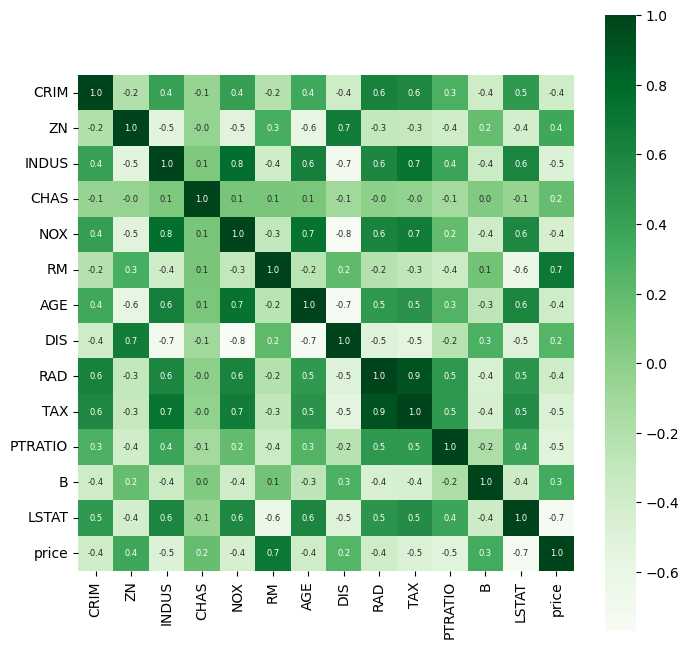

In [5]:
# Checking for correlation between various features 
correlation = house_price_df.corr()
# Constructing heatmap 
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':6}, cmap='Greens')


#### Splitting the input/features data and target/label for prediction 

In [6]:
# Input data or Feature set
X = house_price_df.drop(['price'], axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [7]:
# Target variable or Output
Y = house_price_df['price']
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

#### Splitting the data into training data and test data

In [8]:
# 80% training and 20% test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

In [9]:
print(f"Full feature set shape (X): {X.shape}")
print(f"Training feature set shape (X_train): {X_train.shape}")
print(f"Testing feature set shape (X_test): {X_test.shape}")
print(f"Full target variable shape (Y): {Y.shape}")
print(f"Training target shape (Y_train): {Y_train.shape}")
print(f"Testing target shape (Y_test): {Y_test.shape}")


Full feature set shape (X): (506, 13)
Training feature set shape (X_train): (404, 13)
Testing feature set shape (X_test): (102, 13)
Full target variable shape (Y): (506,)
Training target shape (Y_train): (404,)
Testing target shape (Y_test): (102,)


#### Model training using XGBoost Regressor

In [10]:
# Loading the model
model = XGBRegressor(
    n_estimators=1000,         # allow more trees
    learning_rate=0.01,        # learn slowly
    max_depth=3,               # prevent over-complex trees
    subsample=0.7,             # use 70% of training rows per tree
    colsample_bytree=0.7,      # use 70% of features per tree
    reg_alpha=1.0,             # L1 regularization
    reg_lambda=1.0,            # L2 regularization
    random_state=42,
    eval_metric='mae'
)

In [11]:
# Training  the model with X_train
model.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

#### Evaluation

##### Prediction on training data

In [12]:
# Accuracy of prediction on training data 
training_data_prediction = model.predict(X_train)

In [19]:
# R squared error 
r2_training = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error (MAE)
mae_training = metrics.mean_absolute_error(Y_train, training_data_prediction)

# Mean Squared Error (RMSE)
mse_training = metrics.mean_squared_error(Y_train, training_data_prediction)

# Root Mean Squared Error (RMSE)
rmse_training = np.sqrt(mse_training)

print("R squared error        :", r2_training)
print("Mean Absolute Error    :", mae_training)
print("Mean Squared Error     :", mse_training)
print("Root Mean Squared Error:", rmse_training)

R squared error        : 0.9729259014441566
Mean Absolute Error    : 1.145912501127413
Mean Squared Error     : 2.2331183205870815
Root Mean Squared Error: 1.4943621785186754


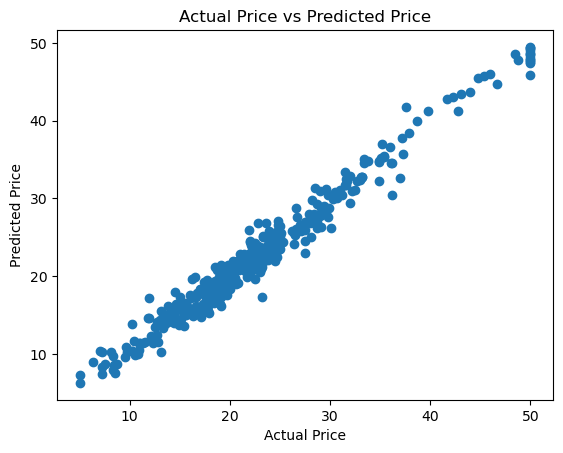

In [14]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

##### Prediction on test data

In [15]:
# Acuracy of prediction of test data
test_data_prediction = model.predict(X_test)

In [18]:
# R squared error
r2_test = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error (MAE)
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)

# Mean Squared Error (RMSE)
mse_test = metrics.mean_squared_error(Y_test, test_data_prediction)

# Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

print("R squared error         :", r2_test)
print("Mean Absolute Error     :", mae_test)
print("Mean Squared Error      :", mse_test)
print("Root Mean Squared Error :", rmse_test)

R squared error         : 0.9073401520753521
Mean Absolute Error     : 2.2352634009192975
Mean Squared Error      : 8.400613062251058
Root Mean Squared Error : 2.8983811105945088
